In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd "/content/drive/MyDrive/Colab Notebooks"

/content/drive/MyDrive/Colab Notebooks


In [3]:
# pip install import-ipynb

In [5]:
import import_ipynb
import SARIMAX_Decomposition as sd

importing Jupyter notebook from GRU_TS_Decomposition.ipynb
--2024-06-16 18:18:20--  https://raw.githubusercontent.com/Danazzz/dataset-beras-scm/master/csv/Beras.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42658 (42K) [text/plain]
Saving to: ‘Beras.csv.5’

Beras.csv.5         100%[===================>]  41.66K  --.-KB/s    in 0.008s  

2024-06-16 18:18:20 (5.16 MB/s) - ‘Beras.csv.5’ saved [42658/42658]

Epoch 1/100
17/17 [==============================] - 3s 5ms/step - loss: 0.4631 - mean_absolute_error: 0.6330
Epoch 2/100
17/17 [==============================] - 0s 5ms/step - loss: 0.3495 - mean_absolute_error: 0.5408
Epoch 3/100
17/17 [==============================] - 0s 4ms/step - loss: 0.2471 - mean_absolute_error: 0.4437
Epoch 4/100
17/17 [=====

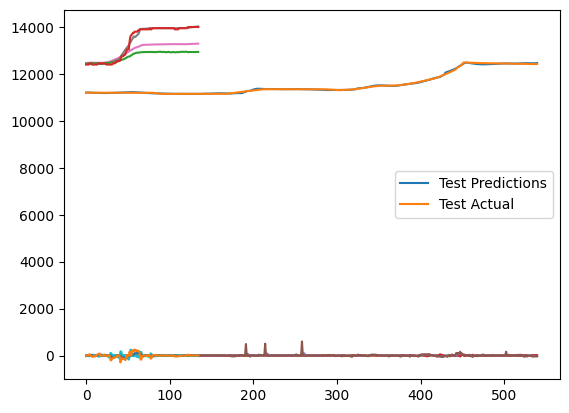

In [6]:
import GRU_TS_Decomposition as gd

In [7]:
sd.predict_seasonal

542    23.508031
543   -11.040852
544   -22.417736
545   -21.869066
546   -21.589053
         ...    
673   -17.887394
674    29.354514
675    -9.729003
676   -16.662239
677   -16.487893
Name: predicted_mean, Length: 136, dtype: float64

In [33]:
predict_seasonal_fixed = sd.predict_seasonal.drop(index=542)
predict_seasonal_fixed = predict_seasonal_fixed.values.reshape(135, 1)

In [25]:
gd.predict_resid.shape

(135, 1)

In [26]:
gd.predict_trend.shape

(135, 1)

In [10]:
len(gd.predict_resid)

135

In [34]:
kombinasi_predict = predict_seasonal_fixed + gd.predict_resid + gd.predict_trend
kombinasi_predict

array([[12440.9924162 ],
       [12445.35694358],
       [12448.65459194],
       [12456.4620809 ],
       [12459.1451552 ],
       [12523.203711  ],
       [12518.20717926],
       [12526.83821858],
       [12494.848096  ],
       [12475.34158163],
       [12435.95573482],
       [12487.93680686],
       [12450.92106372],
       [12447.62777092],
       [12449.98032764],
       [12466.71288805],
       [12484.80428337],
       [12541.62137402],
       [12521.29127359],
       [12506.03505486],
       [12491.35040713],
       [12497.67406251],
       [12462.42647154],
       [12518.75197195],
       [12488.12135842],
       [12482.84334743],
       [12483.87640972],
       [12490.69640509],
       [12502.79648157],
       [12563.87098942],
       [12535.46966577],
       [12501.09108725],
       [12501.73713536],
       [12530.08146964],
       [12524.89592883],
       [12593.09397226],
       [12579.03749721],
       [12603.8508374 ],
       [12624.23591724],
       [12652.50956595],


In [23]:
gd.y_test_asli.shape

(135, 1)

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np
from math import sqrt

rmse = sqrt(mean_squared_error(kombinasi_predict, gd.y_test_asli))
mae = mean_absolute_error(kombinasi_predict, gd.y_test_asli)
print("Root Mean Square Error:", rmse)
print("Mean Absolute Error:", mae)

# R Square
r = r2_score(kombinasi_predict, gd.y_test_asli)

# Mean Magnitude of Relative Error
mmre = (abs((kombinasi_predict - gd.y_test_asli) / gd.y_test_asli)).mean()

# Median Magnitude of Relative Error
mdmre = np.median(abs((kombinasi_predict - gd.y_test_asli) / gd.y_test_asli))

# Mean Magnitude of Error Relative
mmer = (abs(kombinasi_predict - gd.y_test_asli)).mean()

# Mean Square Error
mse = mean_squared_error(kombinasi_predict, gd.y_test_asli)

# Menampilkan hasil
print("R Square: {:.4f}".format(r))
print("Mean Magnitude of Relative Error: {:.4f}".format(mmre))
print("Median Magnitude of Relative Error: {:.4f}".format(mdmre))
print("Mean Magnitude of Error Relative: ", mmer)
print("Mean Square Error:", mse)

Root Mean Square Error: 526.0187405004187
Mean Absolute Error: 439.0728408662245
R Square: -1.3343
Mean Magnitude of Relative Error: 0.0318
Median Magnitude of Relative Error: 0.0462
Mean Magnitude of Error Relative:  439.0728408662245
Mean Square Error: 276695.7153576469


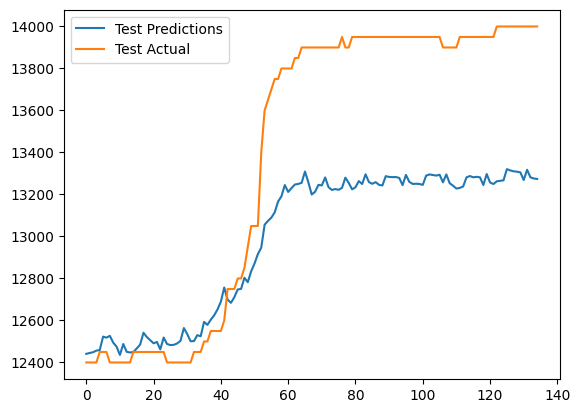

In [38]:
import matplotlib.pyplot as plt

plt.plot(kombinasi_predict)
plt.plot(gd.y_test_asli)
plt.legend(['Test Predictions', 'Test Actual'])